# Species Segmentation with Cluster Analysis

## Import the relevant libraries

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [108]:
# Load the data
data = pd.read_csv('iris-dataset.csv')
# Check the data
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Plot the data

For this exercise, try to cluster the iris flowers by the shape of their sepal. 

<i> Hint: Use the 'sepal_length' and 'sepal_width' variables.</i> 

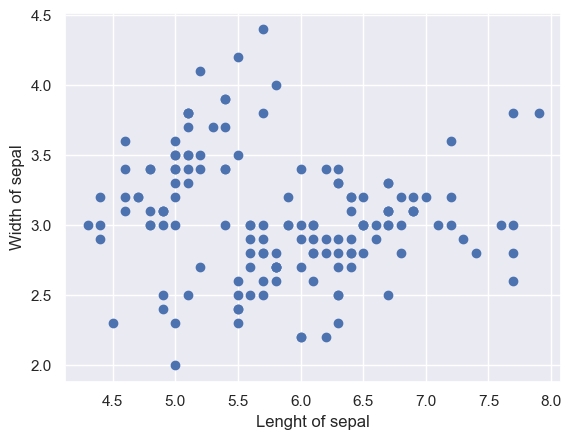

In [111]:
# Create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(data['sepal_length'],data['sepal_width'])
# Name your axes
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

## Clustering (unscaled data)

Separate the original data into 2 clusters.

In [114]:
# create a variable which will contain the data for the clustering
x = data.copy()
# create a k-means object with 2 clusters
kmeans = KMeans(2)
# fit the data
kmeans.fit(x)

D:\Programs_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [115]:
# create a copy of data, so we can see the clusters next to the original data
clusters = data.copy()
# predict the cluster for each observation
clusters['cluster_pred']=kmeans.fit_predict(x)

D:\Programs_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


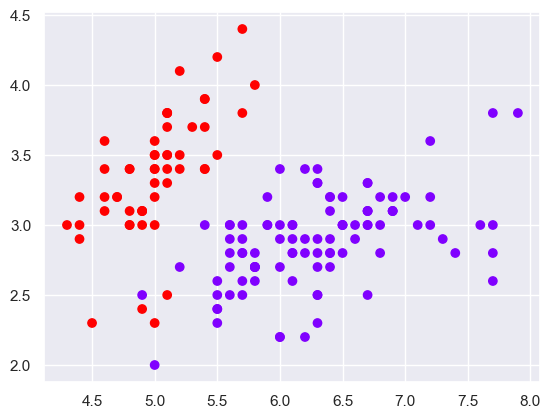

In [116]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c= clusters ['cluster_pred'], cmap = 'rainbow')

## Standardize the variables

Import and use the <i> scale </i> function from sklearn to standardize the data. 

In [119]:
# import some preprocessing module
from sklearn import preprocessing

# scale the data for better results
x_scaled = preprocessing.scale(data)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

## Clustering (scaled data)

In [121]:
# create a k-means object with 2 clusters
kmeans_scaled = KMeans(2)
# fit the data
kmeans_scaled.fit(x_scaled)

D:\Programs_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [122]:
# create a copy of data, so we can see the clusters next to the original data
clusters_scaled = data.copy()
# predict the cluster for each observation
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

D:\Programs_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


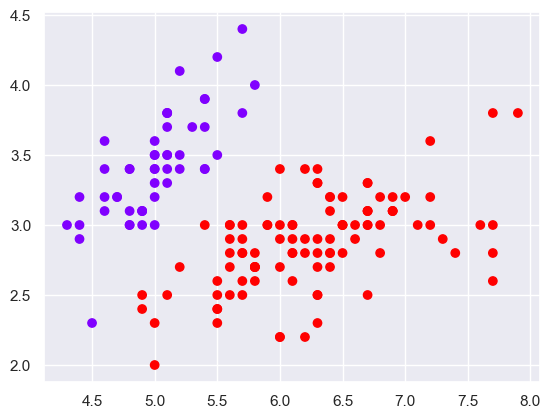

In [123]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c= clusters_scaled ['cluster_pred'], cmap = 'rainbow')

## Take Advantage of the Elbow Method

### WCSS

In [126]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. We have it set at 10 right now, but it is completely arbitrary.
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

D:\Programs_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Programs_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Programs_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Programs_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

[600.0,
 223.73200573676345,
 141.15417813388652,
 115.73518623594576,
 106.41799090396216,
 82.26206861758128,
 70.90458524592047,
 65.47354063198725,
 56.80057852301714]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

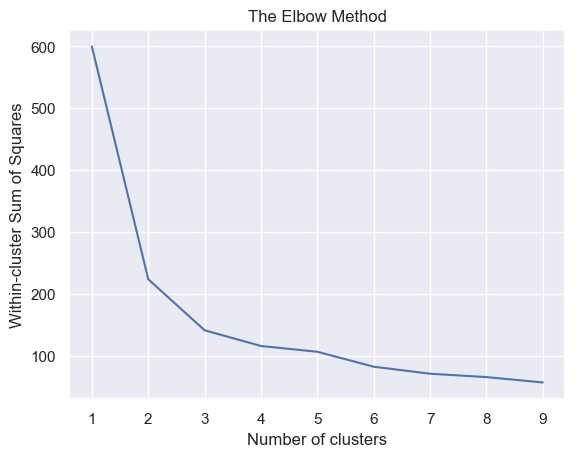

In [128]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

## Understanding the Elbow Curve

Construct and compare the scatter plots to determine which number of clusters is appropriate for further use in our analysis. Based on the Elbow Curve, 2, 3 or 5 seem the most likely.

## 2 clusters

Start by seperating the standardized data into 2 clusters.

In [137]:
kmeans_2 = KMeans(2)
kmeans_2.fit(x_scaled)

D:\Programs_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

A scatter plot of the original data using the standartized clusters.

In [139]:
# Remember that we are plotting the non-standardized values of the sepal length and width. 
clusters_2 = x.copy()
clusters_2['cluster_pred']=kmeans_2.fit_predict(x_scaled)

D:\Programs_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


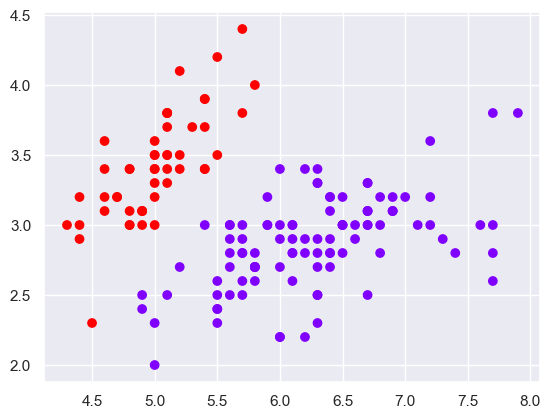

In [140]:
plt.scatter(clusters_2['sepal_length'], clusters_2['sepal_width'], c= clusters_2 ['cluster_pred'], cmap = 'rainbow')

## 3 Clusters

Redo the same for 3 and 5 clusters.

In [143]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)

D:\Programs_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [144]:
clusters_3 = x.copy()
clusters_3['cluster_pred']=kmeans_3.fit_predict(x_scaled)

D:\Programs_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


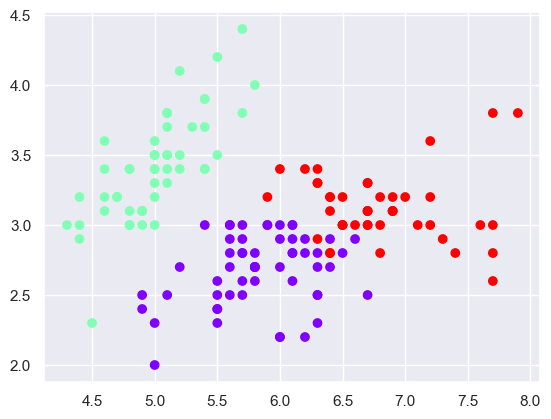

In [145]:
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')

## 5 Clusters

In [147]:
kmeans_5 = KMeans(5)
kmeans_5.fit(x_scaled)

D:\Programs_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [148]:
clusters_5 = x.copy()
clusters_5['cluster_pred']=kmeans_5.fit_predict(x_scaled)

D:\Programs_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


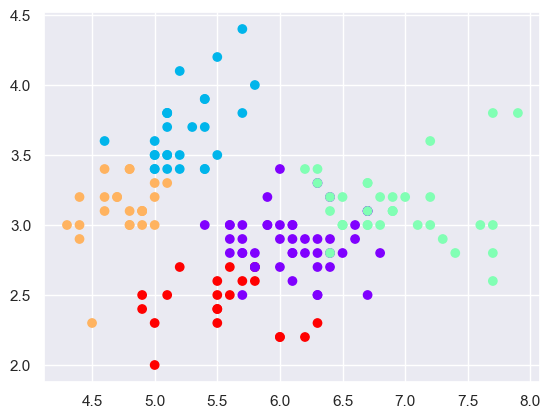

In [149]:
plt.scatter(clusters_5['sepal_length'], clusters_5['sepal_width'], c= clusters_5 ['cluster_pred'], cmap = 'rainbow')

## Compare your solutions to the original iris dataset

In [151]:
real_data = pd.read_csv('iris-with-answers.csv')

In [152]:
real_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [153]:
# We use the map function to change any 'yes' values to 1 and 'no'values to 0. 
real_data['species'] = real_data['species'].map({'setosa':0, 'versicolor':1 , 'virginica':2})

In [154]:
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Scatter plots (which we will use for comparison)

#### 'Real data'

Looking at the first graph it seems like the clustering solution is much more intertwined than what we imagined (and what we found before)

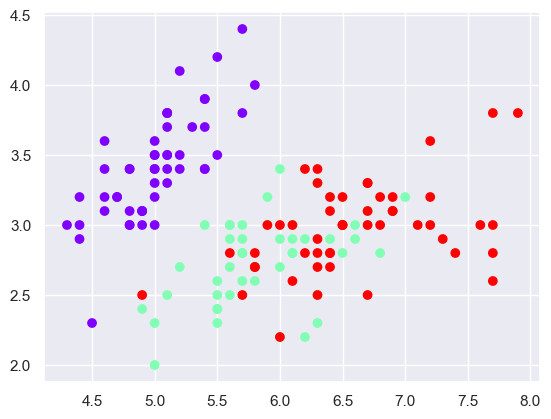

In [158]:
plt.scatter(real_data['sepal_length'], real_data['sepal_width'], c= real_data ['species'], cmap = 'rainbow')

Examining the other scatter plot (petal length vs petal width), we see that in fact the features which actually make the species different are petals and NOT sepals!

Note that 'real data' is the data observed in the real world (biological data)

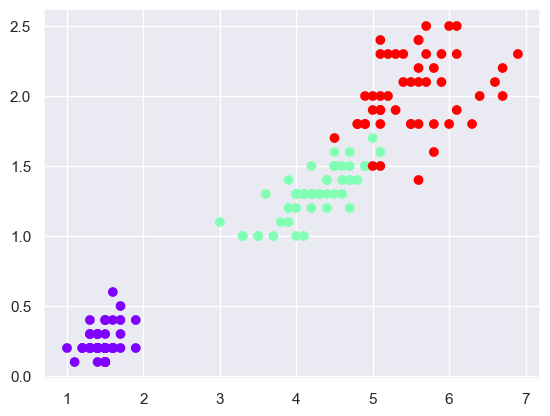

In [160]:
plt.scatter(real_data['petal_length'], real_data['petal_width'], c= real_data ['species'], cmap = 'rainbow')

#### Our clustering solution data

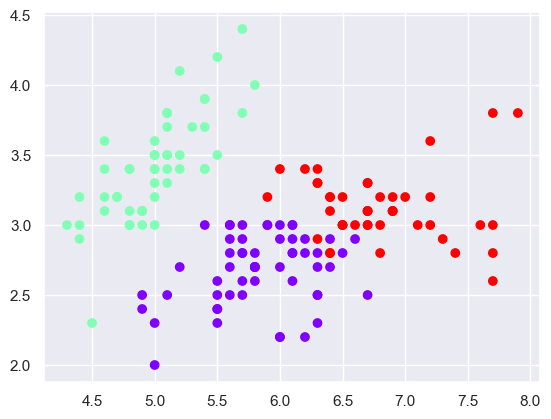

In [163]:
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')

Instead of the petals...

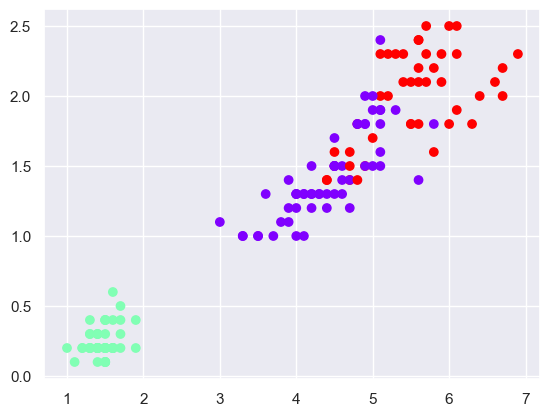

In [165]:
plt.scatter(clusters_3['petal_length'], clusters_3['petal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')